# Project US Speech Analysis

## Part 4: Analyzing Speeches using NLP library spaCy

# Introduction
<br>
<div style="background-color: #78E8A3; padding: 20px">
<h3>More analysis!</h3>
<p>After presenting the insights obtained from the speeches, your editor said he enjoyed it and wanted more.
    
You decided to read up scientific literature, and found that a team of researchers found that <u>high noun-to-verb ratio is a subtle linguistic trait that can reduce anger in response to policies</u>. Source: <a href='https://journals.sagepub.com/doi/abs/10.1177/0956797618772823?journalCode=pssa&'>here</a>.
    
Perhaps this is your next hypothesis: Trump’s speech has a higher noun-to-verb ratio, given how embattled his term has been as compared to Obama’s speech, given that the latter’s term has been relatively more peaceful.
</div>

In this Part, you will:
1. Practice using popular NLP library spaCy 
2. Use spaCy to extract parts-of-speech tags from the speeches
3. Calculate the noun-to-verb scores for the speeches

In [1]:
# Step 1: Import your libraries
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 3: Read your Part III CSV as a DataFrame
df = pd.read_csv('Speech_data_extended.csv')
df

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,Flesch_score
0,obama2010.txt,Obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"['Madam Speaker, Vice President Biden, members...",562,77.754448,17.826429,24.720575
1,obama2011.txt,Obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"['Mr', ' Speaker, Mr', ' Vice President, membe...",500,82.046000,16.543303,32.322806
2,obama2012.txt,Obama,2012,"Mr. Speaker, Mr. Vice President, members of Co...",42203,"['Mr', ' Speaker, Mr', ' Vice President, membe...",518,81.472973,17.344065,26.228014
3,obama2013.txt,Obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41201,"['Mr', ' Speaker, Mr', ' Vice President, membe...",455,90.551648,14.187551,52.062427
4,obama2014.txt,Obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",352,113.661932,19.064501,9.227649
5,obama2015.txt,Obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40268,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",466,86.412017,13.518314,56.194377
6,obama2016.txt,Obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167,"['Mr', ' Speaker, Mr', "" Vice President, Membe...",305,102.186885,17.441406,25.062509
7,trump2018.txt,Trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",323,94.294118,13.843611,51.034490
8,trump2019.txt,Trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945,"['Madam Speaker, Mr', ' Vice President, Member...",298,103.842282,14.799100,44.106260
9,trump2020.txt,Trump,2020,Thank you very much. Thank you. Thank you ve...,39648,"['Thank you very much', ' Thank you', ' Than...",557,71.181329,16.381695,33.439536


### Step 4: Get the POS tags from Obama's 2010 speech and store in a list
We'll start off with analyzing and getting the POS tags from Obama's 2010 speech.

Similar to Step 2, we will be extracting the tags but instead of printing them, let's store them in a list for analysis.

Follow what Step 2 did, except instead of printing the tags, append them to a list.

In [3]:
# Step 4: Get a list of POS tags found in Obama's 2010 speech
tags = []
nlp = spacy.load('en_core_web_sm')
doc = nlp(df['speech'][0])
for token in doc:
    tags.append(token.pos_)
    
tags

['PROPN',
 'PROPN',
 'PUNCT',
 'PROPN',
 'PROPN',
 'PROPN',
 'PUNCT',
 'NOUN',
 'ADP',
 'PROPN',
 'PUNCT',
 'ADJ',
 'NOUN',
 'PUNCT',
 'CCONJ',
 'ADJ',
 'PROPN',
 'PUNCT',
 'SPACE',
 'PRON',
 'PROPN',
 'VERB',
 'SCONJ',
 'ADP',
 'NOUN',
 'ADP',
 'NOUN',
 'PUNCT',
 'DET',
 'PROPN',
 'AUX',
 'VERB',
 'ADP',
 'PROPN',
 'NOUN',
 'ADP',
 'DET',
 'NOUN',
 'ADP',
 'PRON',
 'NOUN',
 'PUNCT',
 'ADP',
 'NUM',
 'NOUN',
 'PUNCT',
 'PRON',
 'NOUN',
 'AUX',
 'VERB',
 'DET',
 'NOUN',
 'PUNCT',
 'PRON',
 'AUX',
 'VERB',
 'ADV',
 'ADP',
 'NOUN',
 'ADP',
 'NOUN',
 'CCONJ',
 'NOUN',
 'PUNCT',
 'CCONJ',
 'PRON',
 'AUX',
 'VERB',
 'ADV',
 'ADP',
 'DET',
 'NOUN',
 'ADP',
 'NOUN',
 'CCONJ',
 'NOUN',
 'PUNCT',
 'ADP',
 'NOUN',
 'ADP',
 'ADJ',
 'NOUN',
 'CCONJ',
 'ADJ',
 'NOUN',
 'PUNCT',
 'SPACE',
 'PRON',
 'AUX',
 'ADJ',
 'PART',
 'VERB',
 'ADV',
 'ADP',
 'DET',
 'NOUN',
 'CCONJ',
 'VERB',
 'SCONJ',
 'PRON',
 'NOUN',
 'AUX',
 'ADJ',
 'PUNCT',
 'PUNCT',
 'SCONJ',
 'PROPN',
 'AUX',
 'ADV',
 'VERB',
 'PART',
 '

In [4]:
# Step 5a: Import Counter from the collections library
from collections import Counter

In [5]:
# Step 5b: Convert the list from Step 4 into a Counter object
counter = Counter(tags)

In [6]:
# Step 5c: Get the value of the key 'NOUN' in the Obama 2010 POS Counter 
counter['NOUN']

1634

### Step 6: Create NOUN_count and VERB_count columns in your DataFrame
Now that you know how to get the NOUN and VERB count using a Counter, you can then extract their counts for each of the speeches. 

Again, we're looking only at NOUN and VERB counts because we will be deriving a noun-to-verb ratio as a metric for alleviating anger towards policies.

In [7]:
# Step 6: Get the counts for NOUN and VERB from speech
noun_count = []
verb_count = []

for speech in df['speech']:
    tags = []
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(speech)
    for token in doc:
        tags.append(token.pos_)
    counter = Counter(tags)
    noun_count.append(counter['NOUN'])
    verb_count.append(counter['VERB'])

In [8]:
df['NOUN_count'] = noun_count
df['VERB_count'] = verb_count
df

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,Flesch_score,NOUN_count,VERB_count
0,obama2010.txt,Obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"['Madam Speaker, Vice President Biden, members...",562,77.754448,17.826429,24.720575,1634,1112
1,obama2011.txt,Obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"['Mr', ' Speaker, Mr', ' Vice President, membe...",500,82.046000,16.543303,32.322806,1549,1081
2,obama2012.txt,Obama,2012,"Mr. Speaker, Mr. Vice President, members of Co...",42203,"['Mr', ' Speaker, Mr', ' Vice President, membe...",518,81.472973,17.344065,26.228014,1624,1099
3,obama2013.txt,Obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41201,"['Mr', ' Speaker, Mr', ' Vice President, membe...",455,90.551648,14.187551,52.062427,1632,1039
4,obama2014.txt,Obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",352,113.661932,19.064501,9.227649,1529,1080
5,obama2015.txt,Obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40268,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",466,86.412017,13.518314,56.194377,1490,1081
6,obama2016.txt,Obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167,"['Mr', ' Speaker, Mr', "" Vice President, Membe...",305,102.186885,17.441406,25.062509,1114,844
7,trump2018.txt,Trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",323,94.294118,13.843611,51.034490,1042,696
8,trump2019.txt,Trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945,"['Madam Speaker, Mr', ' Vice President, Member...",298,103.842282,14.799100,44.106260,1110,662
9,trump2020.txt,Trump,2020,Thank you very much. Thank you. Thank you ve...,39648,"['Thank you very much', ' Thank you', ' Than...",557,71.181329,16.381695,33.439536,1401,818


### Step 7: Create the noun-to-verb ratio column
Create a new column called 'noun_to_verb', which contains the ratio where NOUN_count is divided by VERB_count.

In [9]:
# Step 7: Derive the noun-to-verb ratio
df['noun-to-verb'] = df['NOUN_count'] / df['VERB_count']
df

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,Flesch_score,NOUN_count,VERB_count,noun-to-verb
0,obama2010.txt,Obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"['Madam Speaker, Vice President Biden, members...",562,77.754448,17.826429,24.720575,1634,1112,1.469424
1,obama2011.txt,Obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"['Mr', ' Speaker, Mr', ' Vice President, membe...",500,82.046000,16.543303,32.322806,1549,1081,1.432932
2,obama2012.txt,Obama,2012,"Mr. Speaker, Mr. Vice President, members of Co...",42203,"['Mr', ' Speaker, Mr', ' Vice President, membe...",518,81.472973,17.344065,26.228014,1624,1099,1.477707
3,obama2013.txt,Obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41201,"['Mr', ' Speaker, Mr', ' Vice President, membe...",455,90.551648,14.187551,52.062427,1632,1039,1.570741
4,obama2014.txt,Obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",352,113.661932,19.064501,9.227649,1529,1080,1.415741
5,obama2015.txt,Obama,2015,"Mr. Speaker, Mr. Vice President, Members of Co...",40268,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",466,86.412017,13.518314,56.194377,1490,1081,1.378353
6,obama2016.txt,Obama,2016,"Mr. Speaker, Mr. Vice President, Members of Co...",31167,"['Mr', ' Speaker, Mr', "" Vice President, Membe...",305,102.186885,17.441406,25.062509,1114,844,1.319905
7,trump2018.txt,Trump,2018,"Mr. Speaker, Mr. Vice President, Members of Co...",30457,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",323,94.294118,13.843611,51.034490,1042,696,1.497126
8,trump2019.txt,Trump,2019,"Madam Speaker, Mr. Vice President, Members of ...",30945,"['Madam Speaker, Mr', ' Vice President, Member...",298,103.842282,14.799100,44.106260,1110,662,1.676737
9,trump2020.txt,Trump,2020,Thank you very much. Thank you. Thank you ve...,39648,"['Thank you very much', ' Thank you', ' Than...",557,71.181329,16.381695,33.439536,1401,818,1.712714


### Step 8: Compare Obama's noun-to-verb ratio with Trump's
The moment of truth - the comparison.

Either plot a boxplot like how you did, or just print out the mean of the scores for Obama and Trump.

c:\users\hslim\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='name', ylabel='noun-to-verb'>

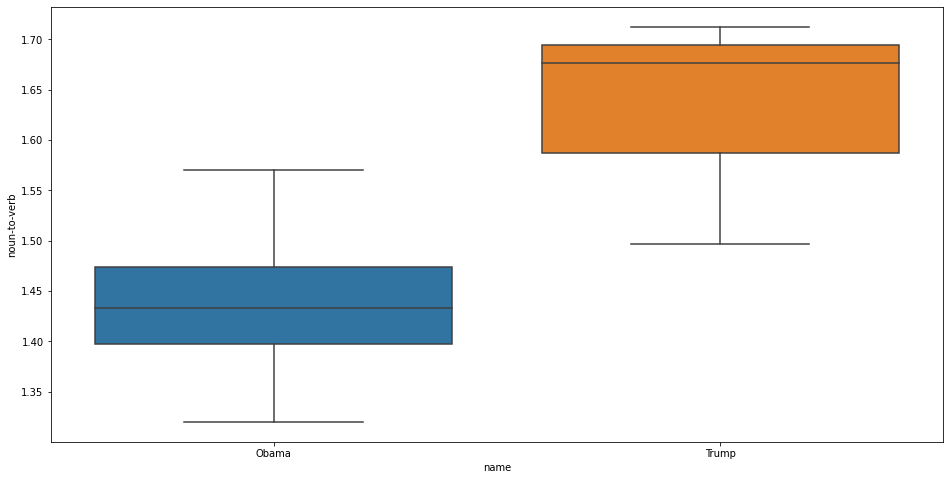

In [10]:
# Step 8: Compare the two politicians' noun-to-verb ratio
plt.figure(figsize = (16,8))
sns.boxplot(df['name'], df['noun-to-verb'])